In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

# Define the number of time steps
T = 100

# Define the state transition matrix
F = np.array([[1]])

# Define the observation matrix
H = np.array([[1]])

# Define the process noise covariance
Q = np.array([[0.1]])

# Define the observation noise covariance
R = np.array([[1]])

# Define the initial state
x0 = np.array([0])

# Generate the true state and observations
x_true = np.zeros((T, 1))
y = np.zeros(T)

x_true[0] = x0
y[0] = H @ np.asarray(x_true[0]) + np.random.multivariate_normal(np.zeros((1,)), R)

for t in range(1, T):
    x_true[t] = F @ x_true[t-1] + np.random.multivariate_normal(np.zeros((1,)), Q)
    y[t] = H @ np.asarray(x_true[t]) + np.random.multivariate_normal(np.zeros((1,)), R)

C:\Users\USER\AppData\Local\Temp\ipykernel_14668\814148278.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[0] = H @ np.asarray(x_true[0]) + np.random.multivariate_normal(np.zeros((1,)), R)
C:\Users\USER\AppData\Local\Temp\ipykernel_14668\814148278.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[t] = H @ np.asarray(x_true[t]) + np.random.multivariate_normal(np.zeros((1,)), R)


In [3]:
# Initialize the state estimate and covariance
x_hat = np.zeros((T, 1))
P = np.zeros((T, 1, 1))

x_hat[0] = x0
P[0] = Q

# Run the Kalman filter
for t in range(1, T):
    # Prediction step
    x_hat[t] = F @ x_hat[t-1]
    P[t] = F @ P[t-1] @ F.T + Q

    # Update step
    K = P[t] @ H.T @ np.linalg.inv(H @ P[t] @ H.T + R)
    x_hat[t] = x_hat[t] + K @ (y[t] - H @ x_hat[t])
    P[t] = (np.eye(1) - K @ H) @ P[t]

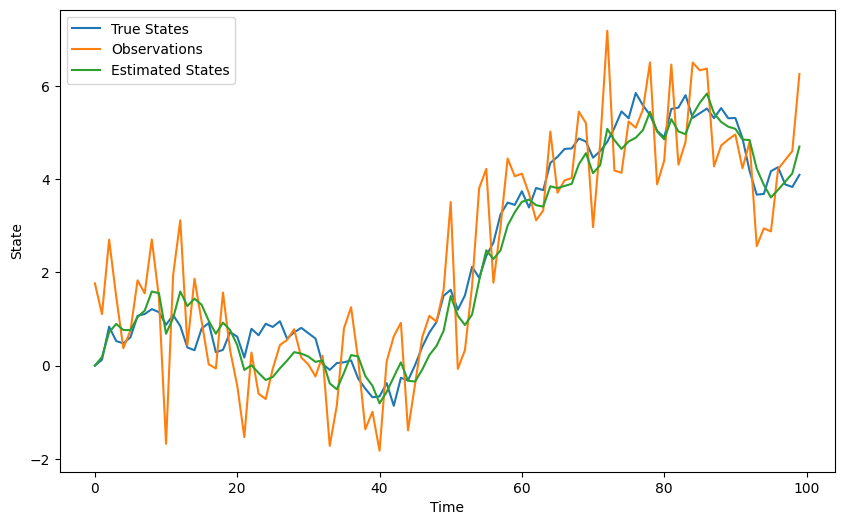

In [4]:
# Plot the true states, observations and estimated states
plt.figure(figsize=(10, 6))
plt.plot(range(T), x_true, label='True States')
plt.plot(range(T), y, label='Observations')
plt.plot(range(T), x_hat, label='Estimated States')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend()
plt.show()

In [5]:
import yfinance as yf

# Download stock price data
data = yf.download('JPM', start='2020-01-01', end='2023-11-30')

[*********************100%%**********************]  1 of 1 completed


In [6]:
# Compute log returns
data['Log Returns'] = np.log(data['Close']).diff()

# Remove missing values
data = data.dropna()

In [7]:
# Define the state transition matrix
F = np.array([[1]])

# Define the observation matrix
H = np.array([[1]])

# Define the process noise covariance
Q = np.array([[0.001]])

# Define the observation noise covariance
R = np.array([[0.01]])

# Define the initial state
x0 = np.array([0])

# Define the number of time steps
T = len(data)

# Generate the observations
y = data['Log Returns'].values.reshape(-1, 1)

In [8]:
# Initialize the state estimate and covariance
x_hat = np.zeros((T, 1))
P = np.zeros((T, 1, 1))

x_hat[0] = x0
P[0] = Q

# Run the Kalman filter
for t in range(1, T):
    # Prediction step
    x_hat[t] = F @ x_hat[t-1]
    P[t] = F @ P[t-1] @ F.T + Q

    # Update step
    K = P[t] @ H.T @ np.linalg.inv(H @ P[t] @ H.T + R)
    x_hat[t] = x_hat[t] + K @ (y[t] - H @ x_hat[t])
    P[t] = (np.eye(1) - K @ H) @ P[t]

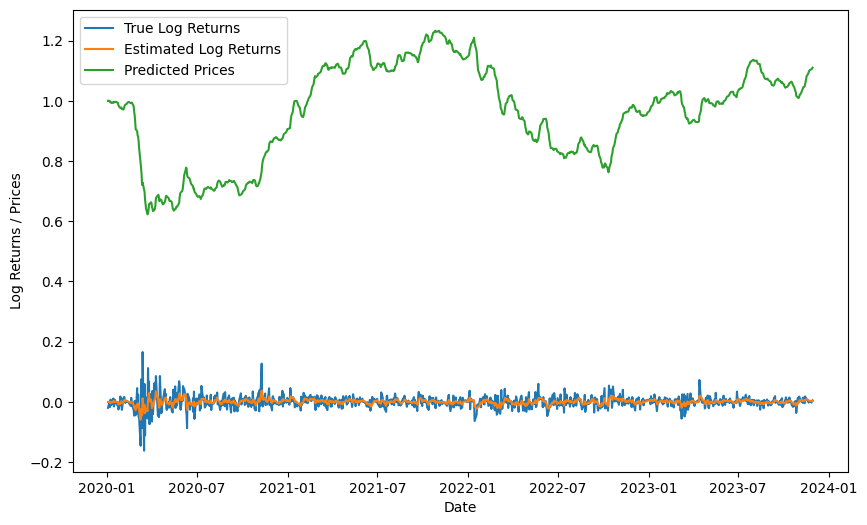

In [9]:
# Compute the estimated log returns
log_returns_hat = x_hat.flatten()

# Compute the predicted stock prices
prices_hat = np.exp(np.cumsum(log_returns_hat))

# Plot the true log returns, estimated log returns and predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Log Returns'], label='True Log Returns')
plt.plot(data.index, log_returns_hat, label='Estimated Log Returns')
plt.plot(data.index, prices_hat, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Log Returns / Prices')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_16140\839086460.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nifty['Adj Close'].fillna(method='ffill', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_16140\839086460.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nifty['Adj Close'].fillna(method='ffill', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipyke

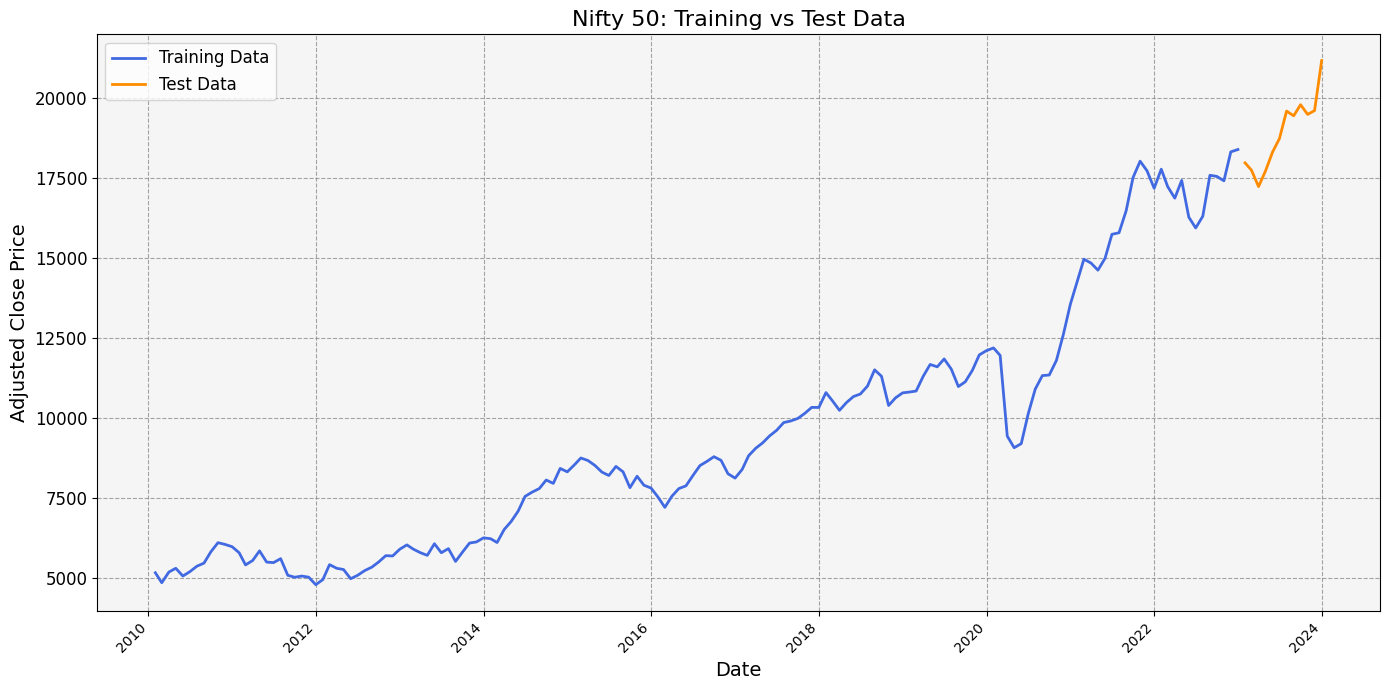

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the start and end dates
start_date = "2010-01-01"
end_date = "2024-01-01"

# Download Nifty 50 data
nifty = yf.download("^NSEI", start=start_date, end=end_date)
nifty['Adj Close'].fillna(method='ffill', inplace=True)
nifty_monthly = nifty['Adj Close'].resample('M').mean()

# Split the data into training and test sets
train = nifty_monthly[:'2022-12-31']
test = nifty_monthly['2023-01-01':]

# Plot the observed data
plt.figure(figsize=(14, 7))

# Set background color
plt.gca().set_facecolor('whitesmoke')

# Plot training data
plt.plot(train, label='Training Data', color='royalblue', linestyle='-', linewidth=2)

# Plot test data
plt.plot(test, label='Test Data', color='darkorange', linestyle='-', linewidth=2)

# Add grid for better readability
plt.grid(True, linestyle='--', color='gray', alpha=0.7)

# Add labels and title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.title('Nifty 50: Training vs Test Data', fontsize=16)

# Add legend
plt.legend(loc='upper left', fontsize=12)

# Set x-tick parameters for better readability
plt.xticks(rotation=45, ha='right')

# Set y-tick parameters for better readability
plt.yticks(fontsize=12)

# Improve plot aesthetics
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.show()
